## Predicting Patients Daily Calories Target: Analysis & Modelling of Food & Nutrition Dataset

**Objective**: Build a Machine Learning model to forecast the Daily Calories Target of each patient and Explain how features (mainly nutritional intake) affect it.

Dataset: https://www.kaggle.com/datasets/bitanianielsen/nutrition-daily-meals-in-diseases-cases/data

**Table of Contents**
1. Loading the Data
2. Exploratory Data Analysis
3. Data Pre-processing & Feature Engineering
4. Training Set Modelling
5. Model Evaluation
6. Features Importance & Model Interpretability
7. Set Modelling

In [1]:
pip install -U -q skimpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install -U -q seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing modules

In [80]:
from skimpy import skim
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



### 1. Loading the Data

In [6]:
df = pd.read_csv("Food_and_Nutrition.csv")
df.head()

Ages  Gender  Height  Weight     Activity Level Dietary Preference  \
0    25    Male     180      80  Moderately Active           Omnivore   
1    32  Female     165      65     Lightly Active         Vegetarian   
2    48    Male     175      95          Sedentary              Vegan   
3    55  Female     160      70        Very Active           Omnivore   
4    62    Male     170      85          Sedentary         Vegetarian   

   Daily Calorie Target  Protein  Sugar  Sodium  Calories  Carbohydrates  \
0                  2000      120  125.0    24.0      2020            250   
1                  1600       80  100.0    16.0      1480            200   
2                  2200      100  150.0    20.0      2185            300   
3                  2500      140  175.0    28.0      2680            350   
4                  2000       80  125.0    16.0      1815            250   

   Fiber  Fat                               Breakfast Suggestion  \
0   30.0   60                      Oatmeal with berries and nuts   
1   24.0   40                         Tofu scramble with veggies   
2   36.0   65                  Tofu and veggie breakfast burrito   
3   42.0   80                Greek yogurt with granola and fruit   
4   30.0   55  Scrambled eggs with whole wheat toast and avocado   

                             Lunch Suggestion  \
0     Grilled chicken salad with mixed greens   
1          Lentil soup with whole wheat bread   
2      Black bean burger on a whole wheat bun   
3              Chicken and vegetable stir-fry   
4  Quinoa salad with chickpeas and vegetables   

                    Dinner Suggestion           Snack Suggestion  \
0      Salmon with roasted vegetables    Greek yogurt with fruit   
1  Vegetable stir-fry with brown rice   Apple with almond butter   
2          Lentil and vegetable curry                  Trail mix   
3        Turkey chili with brown rice  Banana with peanut butter   
4     Vegetarian chili with cornbread          Fruit and nut mix   

                                    Disease  
0                               Weight Gain  
1  Weight Gain, Hypertension, Heart Disease  
2                               Weight Gain  
3                               Weight Gain  
4                               Weight Gain

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [10]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1698   │ │ int32       │ 8     │                                                          │
│ │ Number of columns │ 19     │ │ string      │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Ages                    │   0 │     0 │  43.96 │  15.92 │    18 │     30 │     42 │    57 │    79 │ ▇▇▆▆▅▂ │  │
│ │ Height                  │   0 │     0 │  174.1 │  13.42 │   150 │  163.2 │    174 │   185 │   200 │ ▆▇▇▇▇▅ │  │
│ │ Weight                  │   0 │     0 │  78.06 │  16.95 │    48 │     64 │     78 │    91 │   119 │ ▆▇▇▇▃▂ │  │
│ │ Daily Calorie Target    │   0 │     0 │   2275 │  558.8 │  1200 │   1800 │   2200 │  2689 │  4364 │ ▅▇▆▃▁  │  │
│ │ Protein                 │   0 │     0 │  139.9 │  53.33 │    50 │    100 │    136 │   174 │   327 │ ▆▇▇▃▁  │  │
│ │ Sugar                   │   0 │     0 │  126.2 │  34.94 │    60 │    100 │    124 │   150 │   218 │ ▃▇▆▅▃▁ │  │
│ │ Sodium                  │   0 │     0 │  27.98 │  10.67 │    10 │     20 │   27.2 │  34.8 │  65.4 │ ▆▇▇▃▁  │  │
│ │ Calories                │   0 │     0 │   2196 │  571.1 │   990 │   1770 │   2146 │  2550 │  4357 │ ▃▇▇▃▁  │  │
│ │ Carbohydrates           │   0 │     0 │  252.4 │  69.88 │   120 │    200 │    248 │   300 │   436 │ ▃▇▆▅▃▁ │  │
│ │ Fiber                   │   0 │     0 │  30.29 │  8.385 │  14.4 │     24 │  29.76 │    36 │ 52.32 │ ▃▇▆▅▃▁ │  │
│ │ Fat                     │   0 │     0 │   69.7 │  21.43 │    30 │     52 │     69 │    85 │   145 │ ▅▇▇▅▁  │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴───────┴────────┴────────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                                │     0 │         0 │                        1 │                1698 │  │
│ │ Activity Level                        │     0 │         0 │                      1.8 │                2993 │  │
│ │ Dietary Preference                    │     0 │         0 │                        1 │                1698 │  │
│ │ Breakfast Suggestion                  │     0 │         0 │                      4.9 │                8269 │  │
│ │ Lunch Suggestion                      │     0 │         0 │                      5.3 │                8941 │  │
│ │ Dinner Suggestion                     │     0 │     

We have a dataset of 1658 individuals with 19 features(8 cat and 11 numericals), no NANs(pretty clean dataset).

### 2. Exploratory Analysis

<Figure size 1000x600 with 0 Axes>

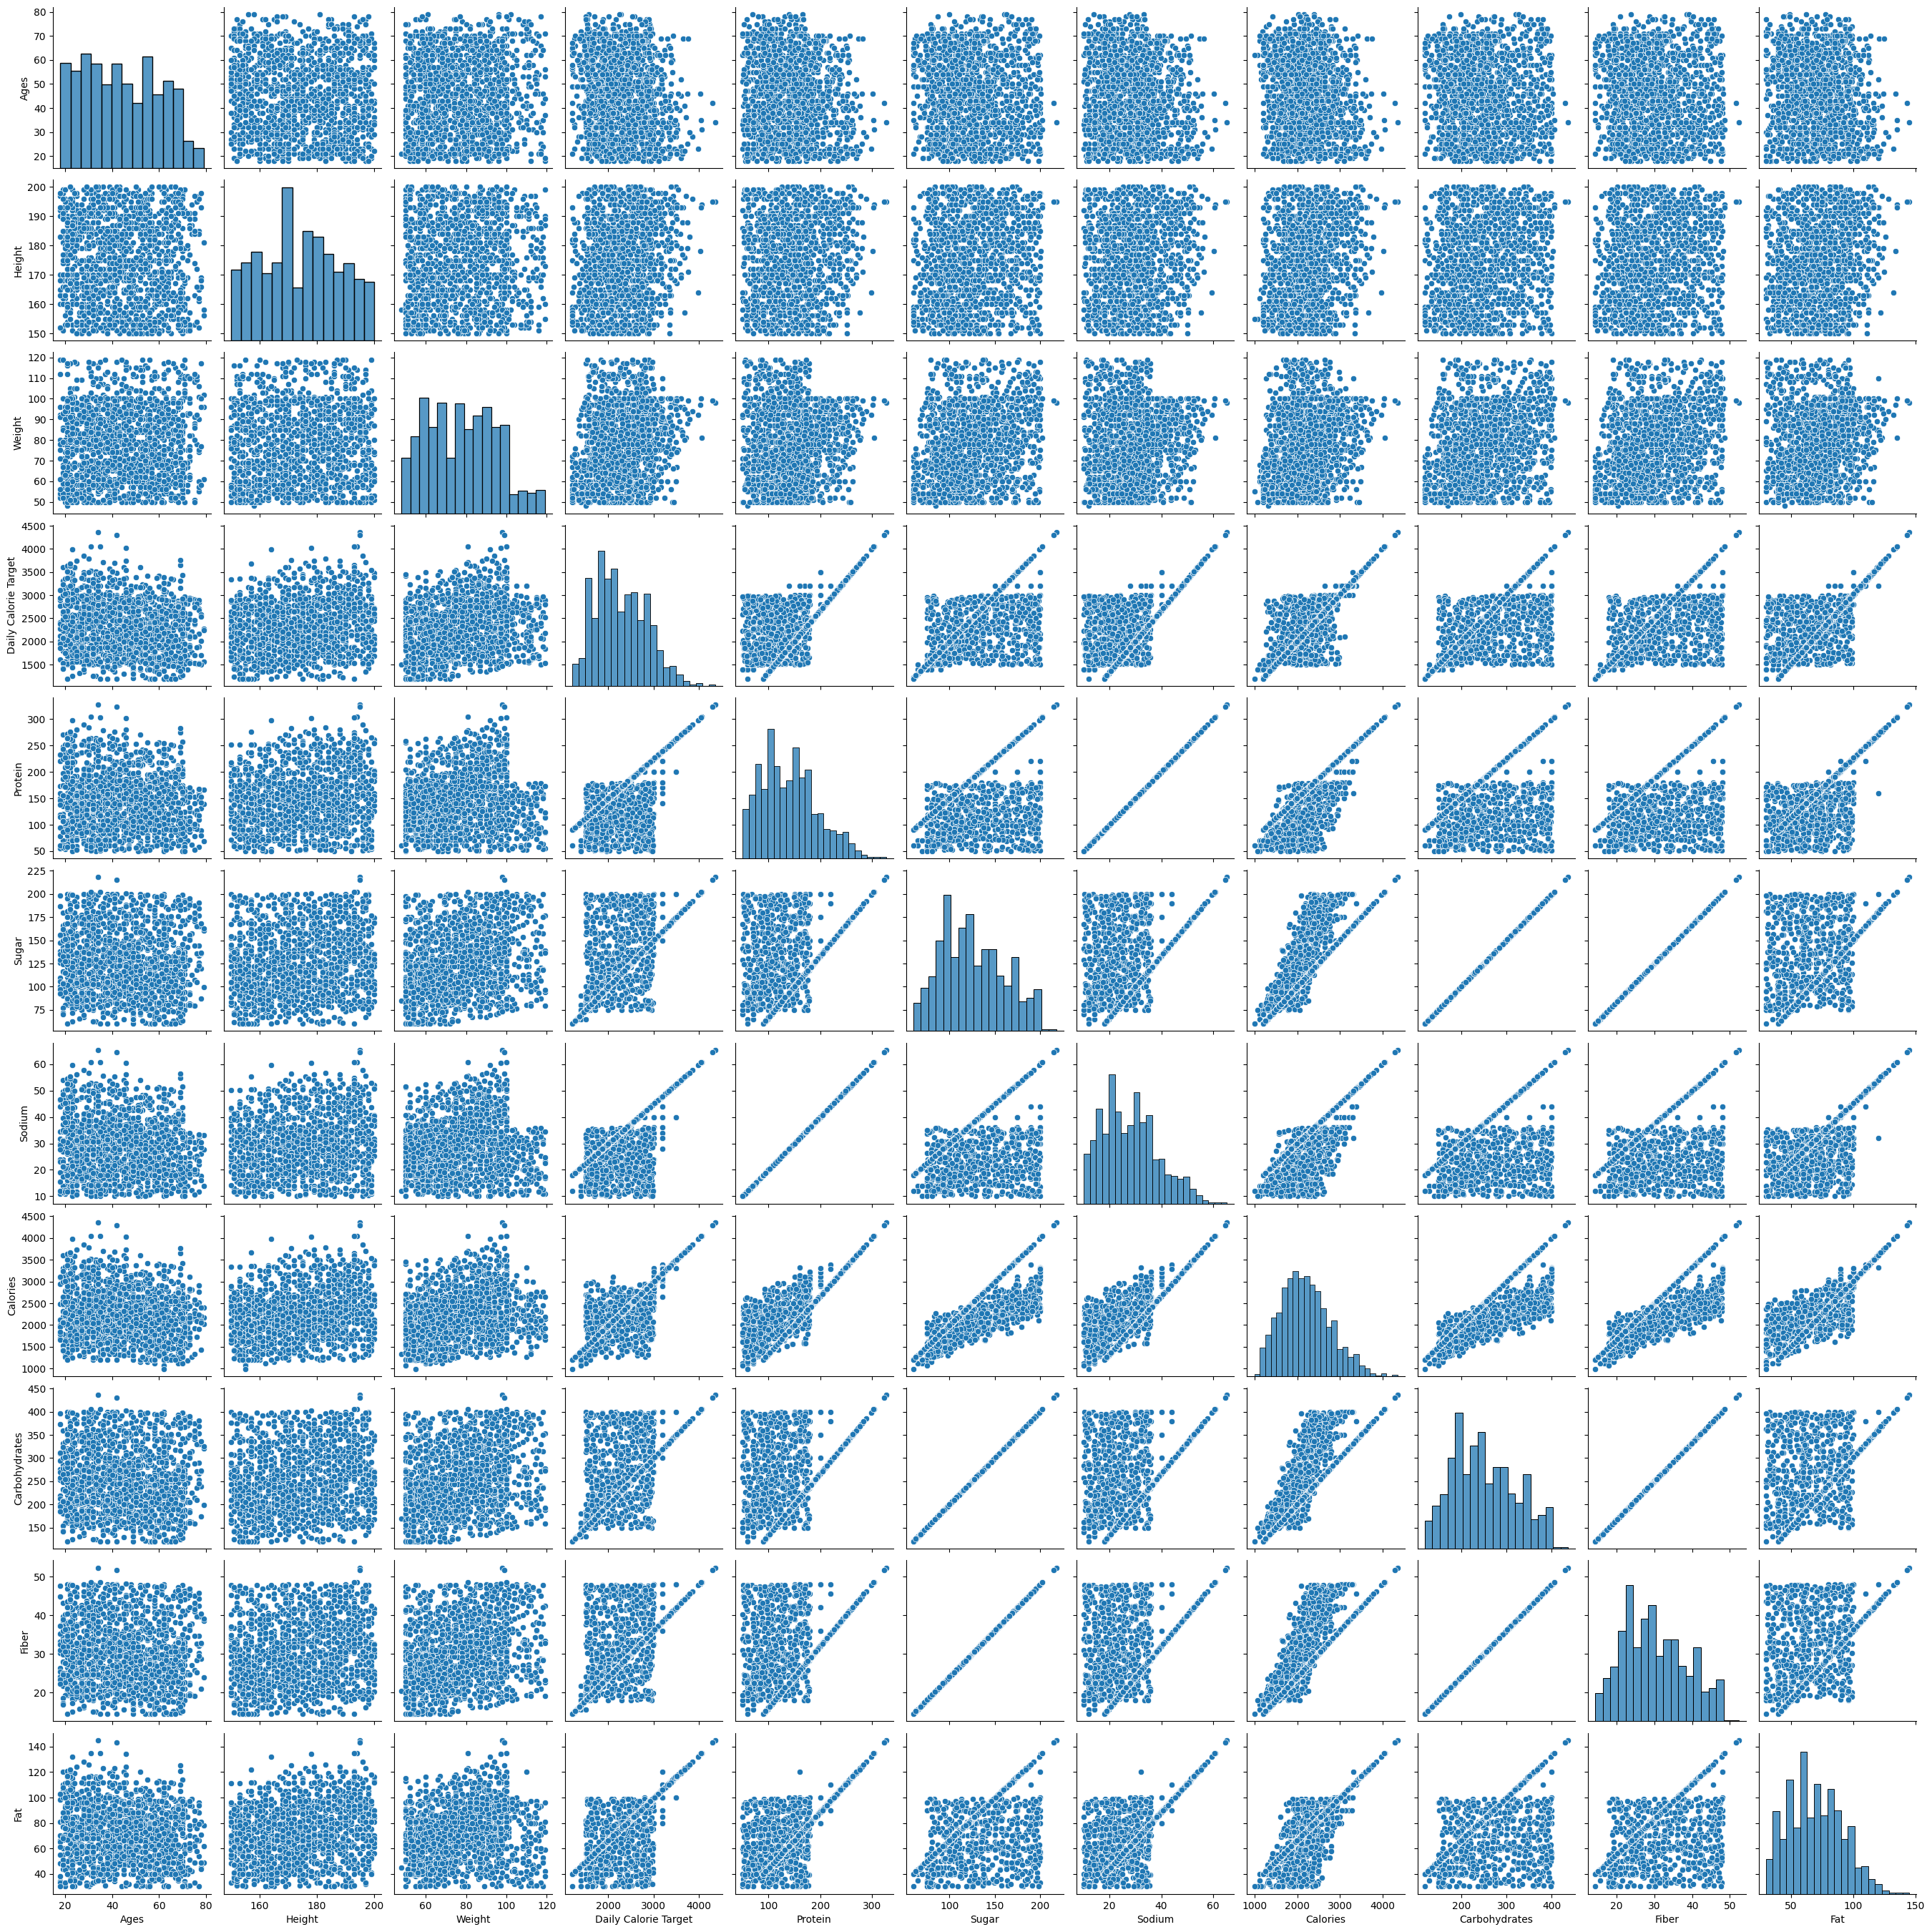

In [16]:
plt.figure(figsize=(10, 6))
sns.pairplot(df)

<Axes: >

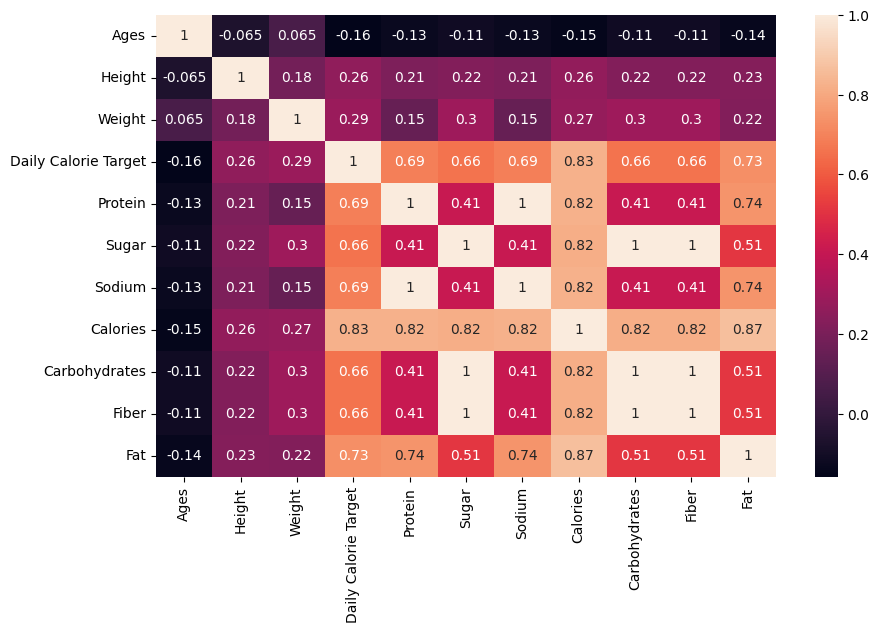

In [24]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.select_dtypes(include=["int", "float"]).corr(), annot=True)

Many feature are strongly correlated to each other, which might(I said might) lead to biaised/spurious results. But since we're merely interested in predicting outcomes and not interpreting coeficient estimates, it is all fine 😑

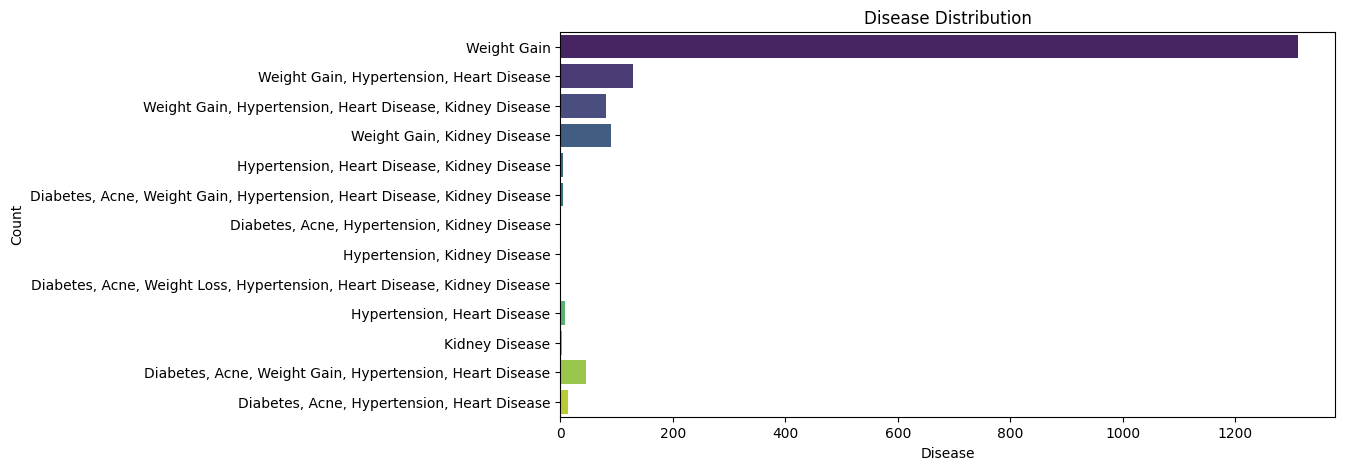

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Disease', data=df, palette='viridis')
plt.title('Disease Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

We have many individual with multiple diseases. We'll create a column one hot ncoded for each and every modality pf this variable

<Axes: xlabel='Daily Calorie Target', ylabel='Density'>

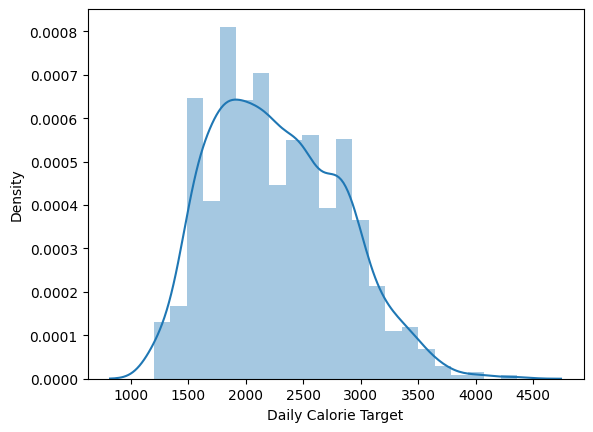

In [31]:
#Plot distribution of target variable
sns.distplot(df['Daily Calorie Target'])

Target variable seems to have a well defined bell curve shape 🙄

<Axes: xlabel='Activity Level', ylabel='Daily Calorie Target'>

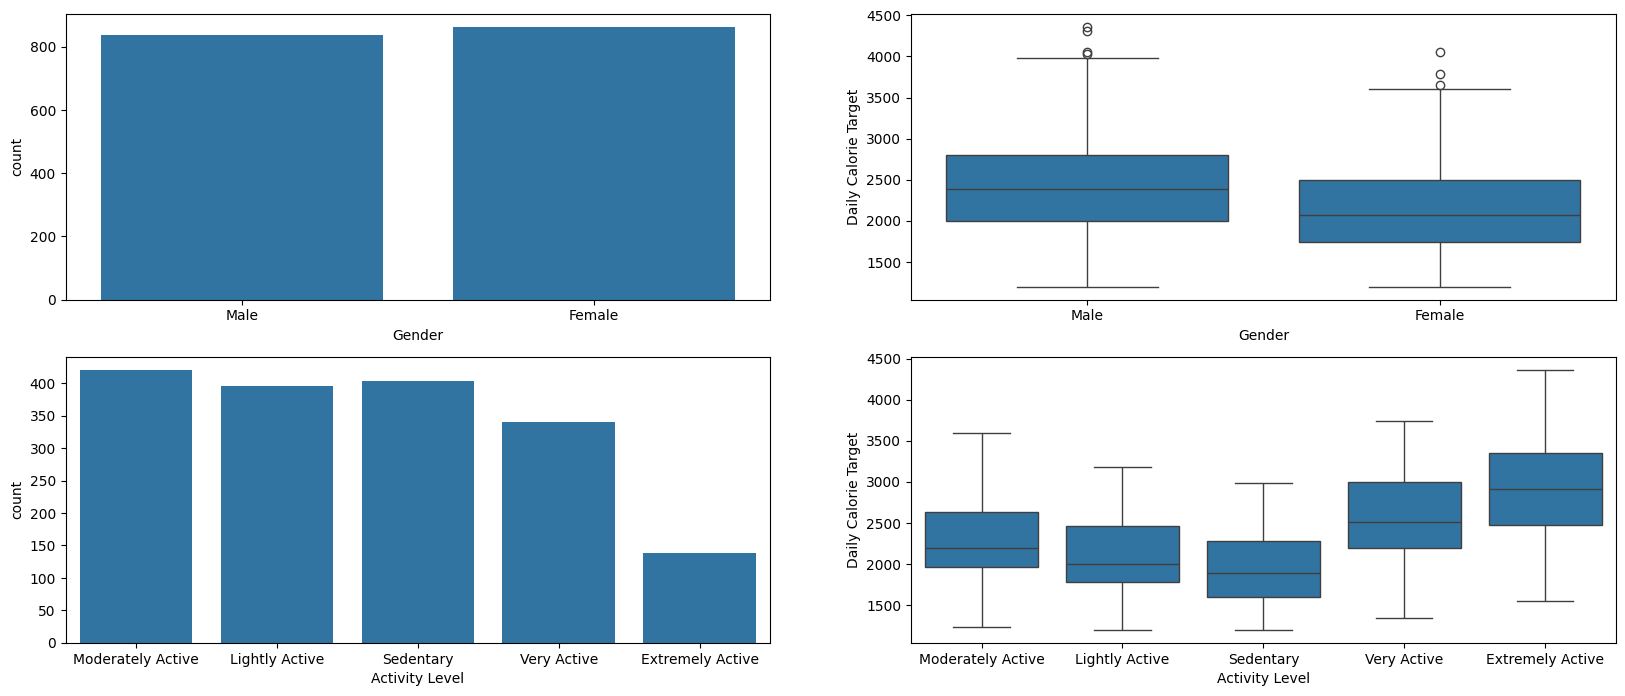

In [33]:
#Set chart size
fig = plt.figure(figsize=(20,26))

ax1 = fig.add_subplot(6,2,1) 
sns.countplot(data = df, x = 'Gender', ax = ax1)
ax2 = fig.add_subplot(6,2,2) 
sns.boxplot(data = df, x='Gender', y='Daily Calorie Target' , ax = ax2)

ax3 = fig.add_subplot(6,2,3) 
sns.countplot(data = df, x='Activity Level', ax = ax3)
ax4 = fig.add_subplot(6,2,4) 
sns.boxplot(data = df, x='Activity Level', y='Daily Calorie Target' , ax = ax4)

We can see clear differences in Daily Calorie targets between Male and Females but also between people with different Level of Activity i.e Extremely Active individuals have a daily target of roughly 3000 calories while Sedantary people have 1700 on average.

### 3. Preprocessing

Data is clean enough so we'll just do some basic wrangling of the data

In [71]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler


In [72]:
df = df.drop_duplicates()

In [73]:
df.describe()

Ages       Height       Weight  Daily Calorie Target  \
count  1698.000000  1698.000000  1698.000000           1698.000000   
mean     43.961720   174.130153    78.064193           2275.171967   
std      15.915002    13.420936    16.949264            558.812405   
min      18.000000   150.000000    48.000000           1200.000000   
25%      30.000000   163.250000    64.000000           1800.000000   
50%      42.000000   174.000000    78.000000           2200.000000   
75%      57.000000   185.000000    91.000000           2689.000000   
max      79.000000   200.000000   119.000000           4364.000000   

           Protein        Sugar       Sodium     Calories  Carbohydrates  \
count  1698.000000  1698.000000  1698.000000  1698.000000    1698.000000   
mean    139.898115   126.192580    27.979623  2196.440518     252.385159   
std      53.326588    34.938902    10.665318   571.089569      69.877804   
min      50.000000    60.000000    10.000000   990.000000     120.000000   
25%     100.000000   100.000000    20.000000  1770.250000     200.000000   
50%     136.000000   124.000000    27.200000  2146.000000     248.000000   
75%     174.000000   150.000000    34.800000  2549.750000     300.000000   
max     327.000000   218.000000    65.400000  4357.000000     436.000000   

             Fiber          Fat  
count  1698.000000  1698.000000  
mean     30.286219    69.700824  
std       8.385337    21.430707  
min      14.400000    30.000000  
25%      24.000000    52.000000  
50%      29.760000    69.000000  
75%      36.000000    85.000000  
max      52.320000   145.000000

In [74]:
df.columns

Index(['Ages', 'Gender', 'Height', 'Weight', 'Activity Level',
       'Dietary Preference', 'Daily Calorie Target', 'Protein', 'Sugar',
       'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat',
       'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
       'Snack Suggestion', 'Disease'],
      dtype='object')

In [106]:
cols_to_scale = ['Ages','Height','Weight','Protein', 'Sugar', 'Sodium', 'Carbohydrates', 'Fiber', 'Fat']
cols_to_encode = ['Gender', 'Activity Level', 'Dietary Preference']

In [118]:
X = df.drop(columns=['Daily Calorie Target', 'Calories', 'Breakfast Suggestion', 'Lunch Suggestion', 'Dinner Suggestion',
       'Snack Suggestion', 'Disease'])
y = df['Daily Calorie Target']

In [109]:
scaler = StandardScaler()
ohe    = OneHotEncoder()

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
        transformers=[
            ("num", Pipeline([("scale", scaler)]), cols_to_scale),
            ("cat", Pipeline([("encode", ohe)]), cols_to_encode),
        ])

### 4. Modeling and performance Eval

We're going to train different models to predict our target variable and evaluate the performance using the RMSE

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error as MSE
import joblib

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [129]:
#Define function to display Cross-Validation scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

*Linear Regression*

This is our baseline model that we'll try to enhance 😁

In [123]:
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('linearreg', LinearRegression())])
#Fit the model
lr.fit(X_train, y_train)
#Predict target
y_pred=lr.predict(X_test)
#Calculate RMSE
rmse_lr = np.sqrt(MSE(y_test, y_pred))
rmse_lr

321.12160958050964

In [128]:
lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Ages', 'Height', 'Weight',
                                                   'Protein', 'Sugar', 'Sodium',
                                                   'Carbohydrates', 'Fiber',
                                                   'Fat']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Activity Level',
                                                   'Dietary Preference'])])),
                ('linearreg', LinearRegression())])

In [130]:
#Scores for Linear Regression
scores=cross_val_score(lr,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
lm_rmse_scores=np.sqrt(-scores)

display_scores(lm_rmse_scores)

Scores: [328.00498856 255.32548596 309.94789944 293.23399479 366.65624944
 314.0030012  282.22788531 315.81011025 326.77564972 277.02694706]
Mean: 306.90122117421475
Standard deviation: 29.829861614677398


In [131]:
filename = 'lr_baseline_model.pkl'
joblib.dump(lr, filename)

['lr_baseline_model.pkl']